# Project 1

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [3]:
data.isnull().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [4]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [5]:
data.shape

(500000, 6)

In [6]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

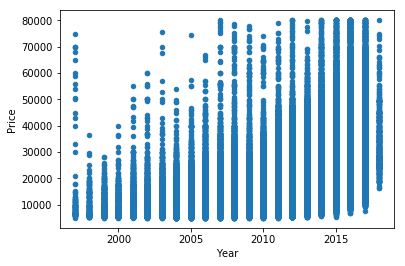

In [7]:
data.plot(kind='scatter', y='Price', x='Year')

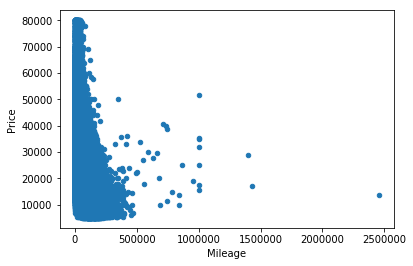

In [8]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [9]:

data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [10]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [11]:
train=data.drop(['Model'], axis=1)
train=pd.get_dummies(train, columns = ['Make','State'])

In [12]:
train.head()

,Price,Year,Mileage,Make_Acura,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [13]:
#y_train=data['Price']
#y_train=data['Price']
#train=data.drop(['State','Make','Model'], axis=1)
train.head()

,Price,Year,Mileage,Make_Acura,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,21490,2014,31909,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21250,2016,25741,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20925,2016,24633,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14500,2012,84026,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32488,2013,22816,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


In [14]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [15]:
data_test.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2015,23388,OH,Ford,EscapeFWD
1,2014,45061,PA,Ford,EscapeSE
2,2007,101033,WI,Toyota,Camry4dr
3,2015,13590,HI,Jeep,Wrangler
4,2009,118916,CO,Dodge,Charger4dr


In [16]:
data_test.shape

(250000, 5)

In [17]:
test=data_test.drop(['Model'], axis=1)
#X_test=pd.get_dummies(test, columns = ['Make'], drop_first=True)
X_test=pd.get_dummies(test, columns = ['Make','State'])
#X_test=pd.get_dummies(data_test, columns = None)

In [18]:
#X_test=data_test.drop(['State','Make','Model'], axis=1)

In [19]:
X_test.columns

Index(['Year', 'Mileage', 'Make_Acura', 'Make_Audi', 'Make_BMW',
       'Make_Bentley', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Dodge', 'Make_FIAT', 'Make_Ford',
       'Make_Freightliner', 'Make_GMC', 'Make_Honda', 'Make_Hyundai',
       'Make_INFINITI', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia', 'Make_Land',
       'Make_Lexus', 'Make_Lincoln', 'Make_MINI', 'Make_Mazda',
       'Make_Mercedes-Benz', 'Make_Mercury', 'Make_Mitsubishi', 'Make_Nissan',
       'Make_Pontiac', 'Make_Porsche', 'Make_Ram', 'Make_Saturn', 'Make_Scion',
       'Make_Subaru', 'Make_Suzuki', 'Make_Tesla', 'Make_Toyota',
       'Make_Volkswagen', 'Make_Volvo', 'State_ AK', 'State_ AL', 'State_ AR',
       'State_ AZ', 'State_ CA', 'State_ CO', 'State_ CT', 'State_ DC',
       'State_ DE', 'State_ FL', 'State_ GA', 'State_ HI', 'State_ IA',
       'State_ ID', 'State_ IL', 'State_ IN', 'State_ KS', 'State_ KY',
       'State_ LA', 'State_ MA', 'State_ MD', 'State_ ME', 'State_ M

In [20]:
train.columns

Index(['Price', 'Year', 'Mileage', 'Make_Acura', 'Make_Audi', 'Make_BMW',
       'Make_Bentley', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Chrysler', 'Make_Dodge', 'Make_FIAT', 'Make_Ford',
       'Make_Freightliner', 'Make_GMC', 'Make_Honda', 'Make_Hyundai',
       'Make_INFINITI', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia', 'Make_Land',
       'Make_Lexus', 'Make_Lincoln', 'Make_MINI', 'Make_Mazda',
       'Make_Mercedes-Benz', 'Make_Mercury', 'Make_Mitsubishi', 'Make_Nissan',
       'Make_Pontiac', 'Make_Porsche', 'Make_Ram', 'Make_Scion', 'Make_Subaru',
       'Make_Suzuki', 'Make_Tesla', 'Make_Toyota', 'Make_Volkswagen',
       'Make_Volvo', 'State_ AK', 'State_ AL', 'State_ AR', 'State_ AZ',
       'State_ CA', 'State_ CO', 'State_ CT', 'State_ DC', 'State_ DE',
       'State_ FL', 'State_ GA', 'State_ HI', 'State_ IA', 'State_ ID',
       'State_ IL', 'State_ IN', 'State_ KS', 'State_ KY', 'State_ LA',
       'State_ MA', 'State_ MD', 'State_ ME', 'State_ MI', 'S

In [21]:
train.shape[0]

500000

In [22]:
train['Make_Saturn']=np.zeros(train.shape[0])

In [23]:
#train.columns

Prueba

In [24]:
# set a seed for reproducibility
np.random.seed(123)

n_samples = data.shape[0]
n_B = 100

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]
print(samples)

[array([249342, 277869,  28030, ..., 384231, 417891, 205465]), array([259358, 191912, 485090, ..., 165025, 390446, 472368]), array([167712, 433257, 398123, ..., 342416, 222047, 495642]), array([  1196,  10205, 393563, ..., 135977, 395189, 204093]), array([227630, 402591, 349947, ..., 416134, 162841, 188238]), array([429121, 200026, 383772, ...,  95913, 284869, 439717]), array([484098, 349008, 364643, ...,  98753,  62897, 487605]), array([416537, 305377,  28181, ..., 377883,  93440, 384089]), array([405844, 428742, 145487, ..., 119798,  57743, 318138]), array([429386, 412573, 437343, ...,  47867, 409601, 194466]), array([126313, 232134,  99384, ..., 150519,  26124, 345404]), array([350359, 356703, 183775, ..., 221628,  35413, 336510]), array([305833,  83558,  19132, ..., 276300,  51236, 400880]), array([368588, 469272, 278726, ..., 222179, 212711, 359520]), array([357784, 351768, 199779, ..., 405773,  65388,  78557]), array([131789, 129360, 274533, ..., 102533, 208898,  62693]), array([

In [25]:
# show the rows for the first decision tree
X_test.head()

,Year,Mileage,Make_Acura,Make_Audi,Make_BMW,Make_Bentley,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,State_ SD,State_ TN,State_ TX,State_ UT,State_ VA,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
ID,,,,,,,,,,,,,,,,,,,,,
0,2015,23388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,45061,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2007,101033,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2015,13590,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2009,118916,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
len(data.index)

500000

In [27]:
from sklearn.tree import DecisionTreeRegressor

# grow each tree deep
treereg = DecisionTreeRegressor(max_depth=5, random_state=123)

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

# grow one tree for each bootstrap sample and make predictions on testing data
for i, sample in enumerate(samples):
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred[i] = treereg.predict(X_test)

In [28]:
print(y_pred)

                  0             1             2             3             4   \
ID                                                                             
0       23246.383148  23263.490749  23343.738183  23313.671005  23207.765509   
1       23246.383148  23263.490749  23343.738183  23313.671005  23207.765509   
2       12565.990773  12511.604201  12391.141990  12471.750919  12517.483528   
3       25611.033960  25654.757318  25617.037540  26827.481534  25548.169838   
4       12565.990773  12511.604201  12391.141990  12471.750919  12517.483528   
5        9727.850174   9634.348249   9592.330875   9593.194537   9745.252393   
6        9493.167164   9474.680869   9378.344612   9447.729589   9509.660655   
7       12565.990773  12511.604201  12391.141990  12471.750919  12517.483528   
8       23246.383148  23263.490749  23343.738183  23313.671005  23207.765509   
9       20399.955282  20251.440106  20342.596251  20191.182083  18615.859701   
10      12565.990773  12511.604201  1239

In [29]:
#from sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier()

In [30]:
#clf.fit(X_train, y_train)

In [31]:
y_pred=y_pred.mean(axis=1)

In [32]:
y_p=pd.DataFrame(data=y_pred,columns=['Price'])

In [34]:
y_p.to_csv('test_marzo9.csv')

# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
